<br>
<br>

# `# Linear Regression:`

<br>
<br>

In [64]:

import torch
import torch.nn as nn
import seaborn as sns
from torchinfo import summary
import matplotlib.pyplot as plt 
from sklearn.datasets import make_regression
from torch.utils.data import Dataset,DataLoader


In [65]:

X, y = make_regression(n_samples=100, n_features=1,noise=20, random_state=42)
X,y

(array([[ 0.93128012],
        [ 0.08704707],
        [-1.05771093],
        [ 0.31424733],
        [-0.47917424],
        [ 0.64768854],
        [-0.46341769],
        [ 0.54256004],
        [ 0.61167629],
        [ 1.0035329 ],
        [ 0.8219025 ],
        [ 1.53803657],
        [ 0.73846658],
        [-0.21967189],
        [-0.8084936 ],
        [ 0.09176078],
        [-1.95967012],
        [ 0.51326743],
        [ 1.03099952],
        [-2.6197451 ],
        [ 0.49671415],
        [ 0.09707755],
        [-0.46572975],
        [ 0.91540212],
        [ 1.56464366],
        [ 1.46564877],
        [-0.60063869],
        [-0.03582604],
        [-0.60170661],
        [-1.19620662],
        [ 0.35711257],
        [ 0.37569802],
        [ 0.26105527],
        [-0.5297602 ],
        [-0.90802408],
        [ 0.19686124],
        [-0.29900735],
        [ 0.36163603],
        [ 0.82254491],
        [-0.29169375],
        [ 0.36139561],
        [-0.676922  ],
        [ 1.52302986],
        [-0

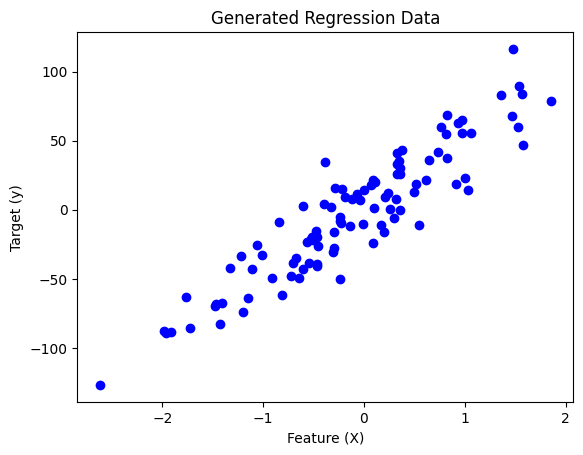

In [66]:
plt.scatter(X, y, color="blue")
plt.title("Generated Regression Data")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.show()


In [67]:
type(X),type(y)

(numpy.ndarray, numpy.ndarray)

<br>
<br>

# `# data pipeline in pytorch:`

<br>
<br>

In [68]:


class LinearDataset(Dataset): 
    # data loading:
    def __init__(self) -> None:
        self.x = torch.from_numpy(X).float()
        self.y = torch.from_numpy(y).unsqueeze(1).float()
        self.n_samples = self.x.shape[0]
    
    
    # data indexing
    def __getitem__(self, index):
        return self.x[index],self.y[index]
    
    # length of the dataset
    def __len__(self):
        return self.n_samples 


In [69]:
dataset = LinearDataset()
first_data = dataset[0]
first_data

(tensor([0.9313]), tensor([62.6872]))

In [70]:

# num_workers=2, use 2 process of my computer
dataloader = DataLoader(dataset=dataset,batch_size=8,shuffle=True,num_workers=2)


In [71]:
data = iter(dataloader)
next(data) # we get 8 batch size data: 

[tensor([[-0.3092],
         [ 0.2089],
         [-0.5298],
         [ 0.7674],
         [-0.5183],
         [-0.3851],
         [-1.1510],
         [-0.6769]]),
 tensor([[-30.2498],
         [  8.9011],
         [-21.2732],
         [ 60.1127],
         [-19.7579],
         [ 34.7095],
         [-64.0803],
         [-34.7453]])]

<br>
<br>

# `# Make a Simple Neural Network: `

<br>
<br>

In [72]:

class Linear(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1,out_features=5)
        self.linear2 = nn.Linear(in_features=5,out_features=1)
    
    # x input data, it's always be forward
    def forward(self,x):
        out = self.linear1(x)
        out = self.linear2(out)
        return out


In [73]:
model = Linear()
model

Linear(
  (linear1): Linear(in_features=1, out_features=5, bias=True)
  (linear2): Linear(in_features=5, out_features=1, bias=True)
)

In [74]:
summary(model=model,input_size=(4,1)) # input_size(batch_size,input_feature)

Layer (type:depth-idx)                   Output Shape              Param #
Linear                                   [4, 1]                    --
├─Linear: 1-1                            [4, 5]                    10
├─Linear: 1-2                            [4, 1]                    6
Total params: 16
Trainable params: 16
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [75]:

# a generator object, push it into a list to show all the element
print(model.parameters()) 

# requires_grad=True, means, when we will train the model, this value will be updated,
# If, requires_grad=False, then the value will not be update.
print(list(model.parameters()))



<generator object Module.parameters at 0x74da04527680>
[Parameter containing:
tensor([[-0.7879],
        [-0.6290],
        [-0.9687],
        [ 0.2004],
        [ 0.5787]], requires_grad=True), Parameter containing:
tensor([0.1058, 0.0644, 0.8898, 0.9876, 0.5231], requires_grad=True), Parameter containing:
tensor([[-0.3738, -0.2469, -0.0977,  0.0388, -0.2355]], requires_grad=True), Parameter containing:
tensor([-0.3012], requires_grad=True)]


<br>
<br>

# `# Loss,Optimizer and Tranning Loop: `

<br>
<br>

In [76]:

criterion = nn.MSELoss()
optimizers = torch.optim.SGD(lr=0.01,params=model.parameters())


In [79]:
# tranning loop:
import math 
num_epoch = 100
total_sample = len(dataset)
n_iterations = math.ceil(total_sample/8) # total_sample/batch_size
total_sample,n_iterations

(100, 13)

In [80]:
for epoch in range(num_epoch):
    for i,(input,label) in enumerate(dataloader):
        model.train()
        input = input.float()
        label = label.float()
        optimizers.zero_grad()
        out = model(input)
        loss = criterion(out,label)
        loss.backward()
        optimizers.step()
        if( (i+1)%2==0):
            print(f"Epoch: [{epoch+1} / {num_epoch}], loss: {loss.item():.6f}")
            

Epoch: [1 / 100], loss: 748.373962
Epoch: [1 / 100], loss: 389.346954
Epoch: [1 / 100], loss: 297.480652
Epoch: [1 / 100], loss: 438.009491
Epoch: [1 / 100], loss: 423.432648
Epoch: [1 / 100], loss: 396.466980
Epoch: [2 / 100], loss: 940.166870
Epoch: [2 / 100], loss: 531.340393
Epoch: [2 / 100], loss: 489.930969
Epoch: [2 / 100], loss: 250.054962
Epoch: [2 / 100], loss: 262.786072
Epoch: [2 / 100], loss: 176.662094
Epoch: [3 / 100], loss: 1327.515991
Epoch: [3 / 100], loss: 574.528198
Epoch: [3 / 100], loss: 778.817688
Epoch: [3 / 100], loss: 449.243866
Epoch: [3 / 100], loss: 746.415894
Epoch: [3 / 100], loss: 334.376831
Epoch: [4 / 100], loss: 259.869110
Epoch: [4 / 100], loss: 447.030182
Epoch: [4 / 100], loss: 740.311829
Epoch: [4 / 100], loss: 698.232056
Epoch: [4 / 100], loss: 377.043152
Epoch: [4 / 100], loss: 997.199219
Epoch: [5 / 100], loss: 306.231110
Epoch: [5 / 100], loss: 519.869812
Epoch: [5 / 100], loss: 260.739990
Epoch: [5 / 100], loss: 281.576355
Epoch: [5 / 100], l